# PCA Assignment:-
### Objective:
- Reduce the number of attributes/features in data to make the analysis of the results
comprehensible to doctors.

### Actions to Perform:
1. Use pandas to read data as a dataframe.
2. Check the data. Perform EDA and there should be no missing values.
3. Convert the diagnosis column to 1/0 and store in a new column target.
4. Perform Encoding like store the encoded column in the dataframe and drop the diagnosis
column for simplicity.
5. Scale the data so that each feature has a single unit variance.
6. Transform this data to its first 2 principal components.
7. Plot the two dimensions.
8. Print the explained variance.
9. Try the same with 3 principal components.
10. Check the accuracy for 2nd and 3rd components.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

## Reading Data

In [3]:
df = pd.read_csv("breast-cancer-data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## EDA

In [5]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [7]:
df1 = df.drop(["diagnosis","id"], axis=1)

In [8]:
df1.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### checking Outliers by using BoxPlot

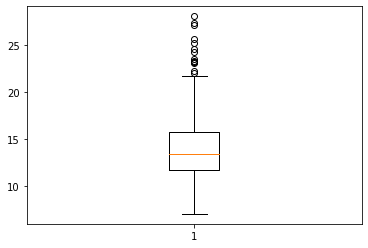

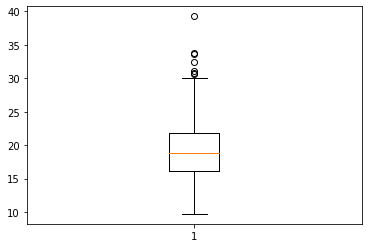

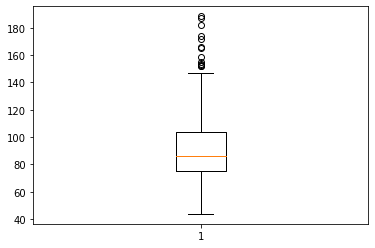

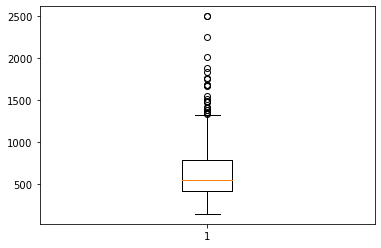

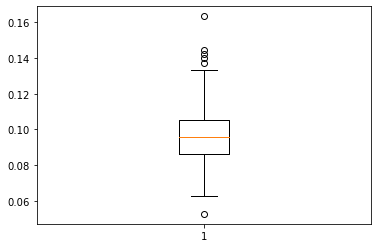

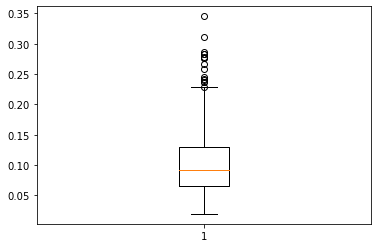

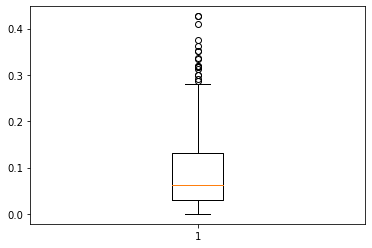

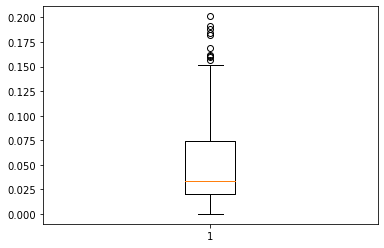

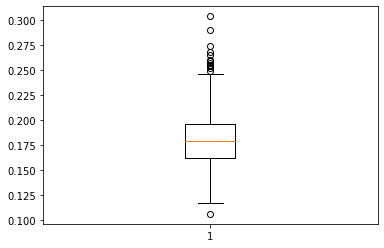

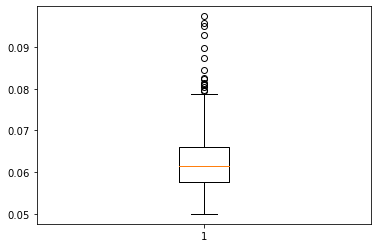

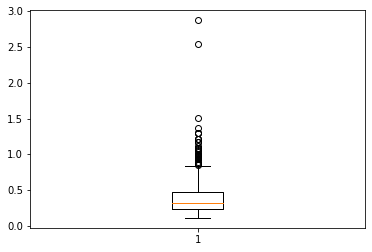

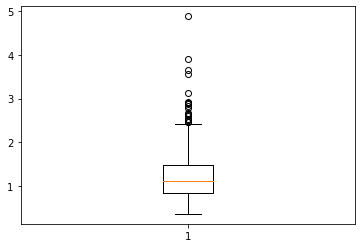

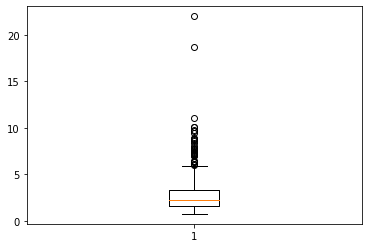

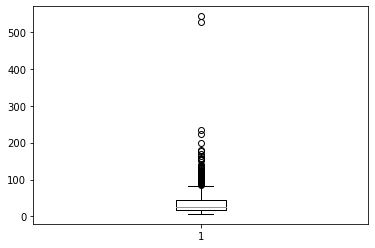

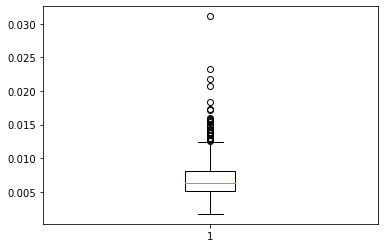

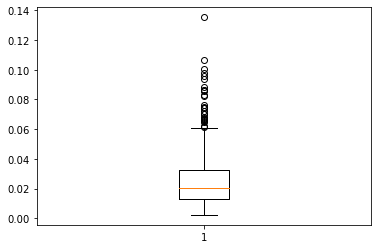

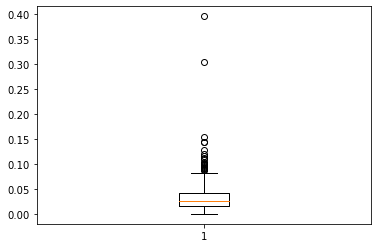

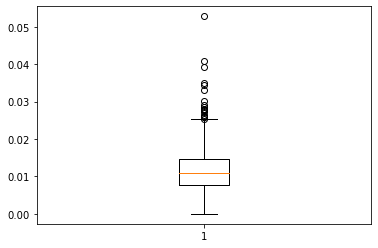

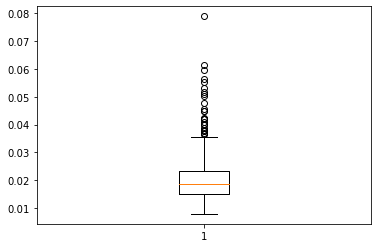

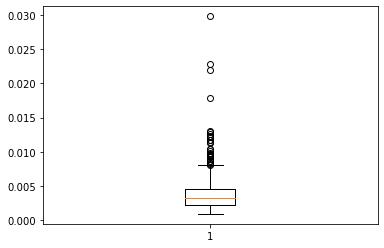

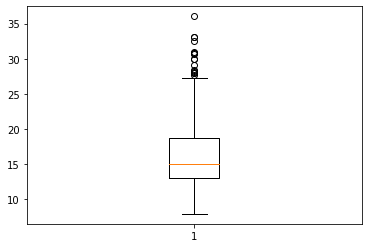

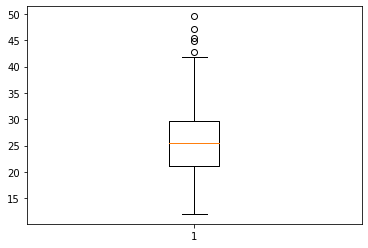

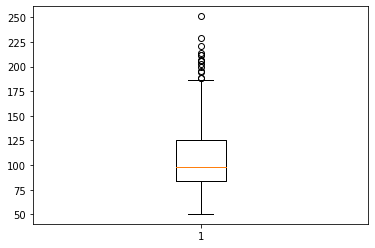

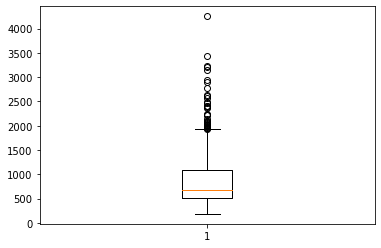

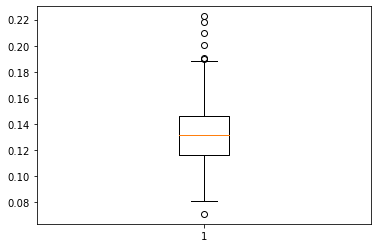

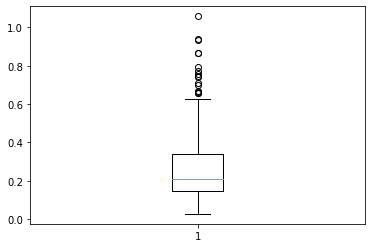

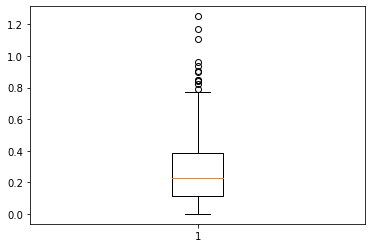

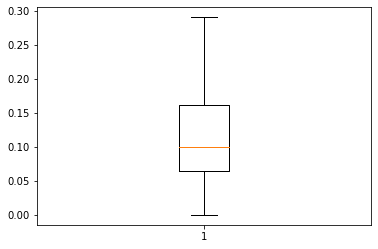

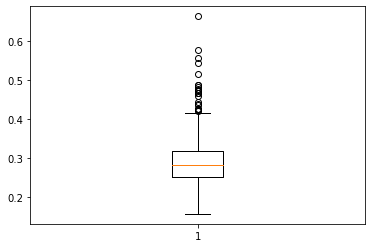

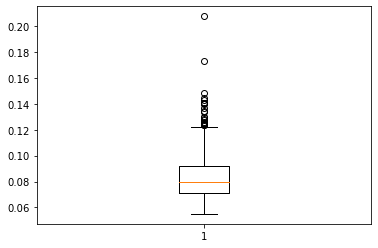

In [9]:
import matplotlib.pyplot as plt
for i in df1:
    plt.figure()
    plt.boxplot(df1[i])

In [10]:
# Removing outliers
df2 = df1[df1["area_mean"]<1400]
df2 = df1[df1["fractal_dimension_worst"]<0.12]
df2 = df2[df2["symmetry_worst"]<0.4]
df2 = df2[df2["perimeter_worst"]<178]
df2.shape

(500, 30)

<AxesSubplot:>

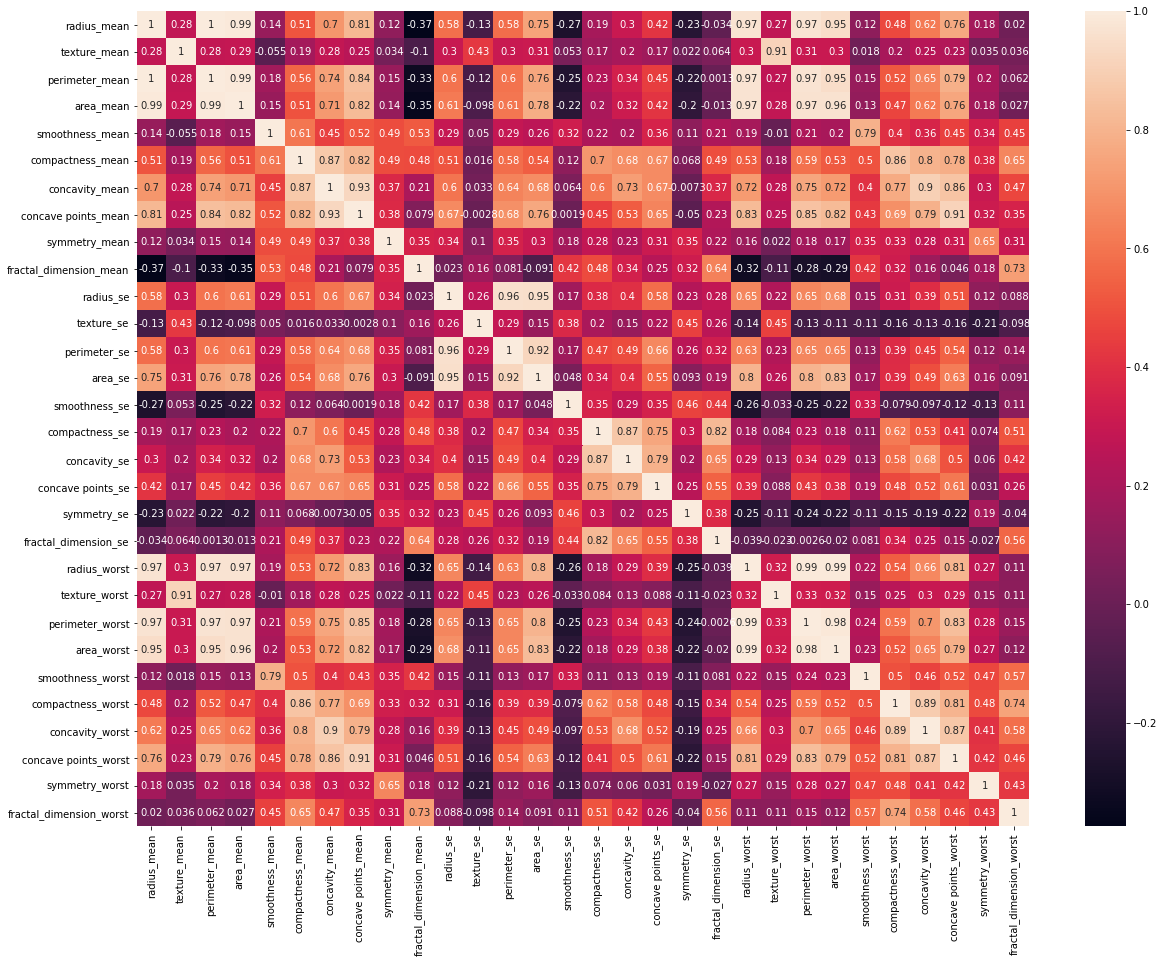

In [11]:
import seaborn as sns
plt.figure(figsize=(20,15))
sns.heatmap(df2.corr(), annot=True, fmt="0.2g")

In [12]:
df2.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

### Checking Multicollinearity and Removing inter Correlated columns

In [13]:
list1= ['area_mean','radius_worst','perimeter_worst','area_worst','concave points_worst','perimeter_mean','texture_worst','perimeter_se', 'area_se']
df2 = df2.drop(list1, axis=1)

## Scaling data

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(df2.values)
X1 = pd.DataFrame(X, columns=df2.columns)
X1.describe()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
count,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,...,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02
mean,2.908784e-16,-4.010126e-16,-4.121148e-16,-3.179679e-16,-2.198242e-16,9.769963e-17,-2.635669e-16,-1.327161e-15,7.394085e-17,2.046141e-16,...,1.239009e-16,-1.509903e-17,-2.002842e-16,-9.547918e-17,-2.196021e-16,-4.352074e-16,-4.796163e-17,4.174439e-17,2.250422e-16,-2.138290e-16
std,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,...,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00
min,-2.213477e+00,-2.224805e+00,-3.244414e+00,-1.759360e+00,-1.145171e+00,-1.289079e+00,-2.954283e+00,-2.042719e+00,-1.216710e+00,-1.518041e+00,...,-1.366952e+00,-1.323522e+00,-1.940149e+00,-1.748952e+00,-1.159877e+00,-2.787806e+00,-1.662054e+00,-1.376300e+00,-2.724404e+00,-1.939047e+00
25%,-6.893147e-01,-7.257889e-01,-7.423585e-01,-7.667685e-01,-7.289522e-01,-7.068585e-01,-7.071273e-01,-7.316258e-01,-6.849682e-01,-6.948829e-01,...,-6.884128e-01,-6.641450e-01,-6.670419e-01,-7.167475e-01,-5.914018e-01,-7.326831e-01,-7.224479e-01,-7.527296e-01,-7.286892e-01,-7.582512e-01
50%,-1.827980e-01,-9.487751e-02,-2.517462e-02,-2.080470e-01,-3.351063e-01,-3.789044e-01,-3.826906e-02,-1.386947e-01,-2.789063e-01,-1.838587e-01,...,-2.802765e-01,-2.503999e-01,-1.336635e-01,-1.786556e-01,-2.370903e-01,5.212553e-03,-1.918090e-01,-2.292441e-01,-3.928067e-02,-1.535742e-01
75%,4.612606e-01,5.938273e-01,6.762174e-01,5.538620e-01,4.764550e-01,5.577238e-01,6.471810e-01,5.705223e-01,3.143567e-01,4.642696e-01,...,4.595329e-01,4.998103e-01,4.673384e-01,4.355265e-01,2.999842e-01,6.296777e-01,5.804021e-01,6.406190e-01,7.008853e-01,6.007488e-01
max,3.159389e+00,4.895824e+00,3.262624e+00,5.162174e+00,4.405461e+00,3.679690e+00,4.026730e+00,4.745319e+00,4.806342e+00,6.538692e+00,...,5.572897e+00,5.515162e+00,5.174463e+00,6.053454e+00,8.595715e+00,2.930527e+00,4.224712e+00,4.070481e+00,2.692696e+00,2.992802e+00


## Checking Variance

In [15]:
X1.var()

radius_mean                1.002004
texture_mean               1.002004
smoothness_mean            1.002004
compactness_mean           1.002004
concavity_mean             1.002004
concave points_mean        1.002004
symmetry_mean              1.002004
fractal_dimension_mean     1.002004
radius_se                  1.002004
texture_se                 1.002004
smoothness_se              1.002004
compactness_se             1.002004
concavity_se               1.002004
concave points_se          1.002004
symmetry_se                1.002004
fractal_dimension_se       1.002004
smoothness_worst           1.002004
compactness_worst          1.002004
concavity_worst            1.002004
symmetry_worst             1.002004
fractal_dimension_worst    1.002004
dtype: float64

## Label Encoding for Target Variable

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Target = le.fit_transform(df["diagnosis"])

In [17]:
X1["Target"] = pd.Series(Target)

In [18]:
X1.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst,Target
0,2.263307,-0.283910,-0.770861,-0.354764,0.223975,0.863134,0.164981,-0.899453,0.841662,-0.852642,...,-0.438963,0.390800,-0.874025,0.011405,-0.274185,-0.286366,0.080355,-0.080556,0.648727,1
1,1.973398,0.554094,1.144197,1.571281,1.964948,2.633795,1.231006,-0.333783,1.811125,-0.758271,...,0.498859,1.639771,0.379824,0.472865,0.709676,1.767971,1.339253,1.844880,0.539063,1
2,2.171063,-1.109874,0.427784,0.928950,1.974401,1.909950,0.152537,-0.531426,1.866770,-0.768242,...,1.381515,1.338835,-0.339573,0.714477,0.375354,-0.127476,1.035381,-0.941759,-0.283420,1
3,1.499002,0.248271,-0.008998,0.364837,0.630464,0.980606,0.090318,-0.771666,0.377317,-0.782665,...,-0.251589,-0.132794,-0.903150,-0.589514,0.700124,0.326740,0.905150,0.617777,0.242055,1
4,0.003337,0.452956,1.860611,1.680312,0.330481,0.546605,1.757797,2.140171,1.033540,0.292444,...,-0.140306,0.578667,-0.732767,0.846386,1.712641,1.281804,0.238321,0.914513,2.634870,1


In [19]:
input1 = X1.drop("Target", axis=1)
out = X1.Target

In [20]:
input1.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,2.263307,-0.283910,-0.770861,-0.354764,0.223975,0.863134,0.164981,-0.899453,0.841662,-0.852642,...,-0.645434,-0.438963,0.390800,-0.874025,0.011405,-0.274185,-0.286366,0.080355,-0.080556,0.648727
1,1.973398,0.554094,1.144197,1.571281,1.964948,2.633795,1.231006,-0.333783,1.811125,-0.758271,...,1.152365,0.498859,1.639771,0.379824,0.472865,0.709676,1.767971,1.339253,1.844880,0.539063
2,2.171063,-1.109874,0.427784,0.928950,1.974401,1.909950,0.152537,-0.531426,1.866770,-0.768242,...,0.122862,1.381515,1.338835,-0.339573,0.714477,0.375354,-0.127476,1.035381,-0.941759,-0.283420
3,1.499002,0.248271,-0.008998,0.364837,0.630464,0.980606,0.090318,-0.771666,0.377317,-0.782665,...,-0.596124,-0.251589,-0.132794,-0.903150,-0.589514,0.700124,0.326740,0.905150,0.617777,0.242055
4,0.003337,0.452956,1.860611,1.680312,0.330481,0.546605,1.757797,2.140171,1.033540,0.292444,...,0.501346,-0.140306,0.578667,-0.732767,0.846386,1.712641,1.281804,0.238321,0.914513,2.634870


In [21]:
out.head()

0    1
1    1
2    1
3    1
4    1
Name: Target, dtype: int32

# PCA

### 1) With 2 Principal components

In [22]:
from sklearn.decomposition import PCA

model_c2 = PCA(n_components=2)
model_c2.fit(input1)
X2 = model_c2.transform(input1)

In [23]:
model_c2.explained_variance_ratio_

array([0.4029221 , 0.15210395])

In [24]:
np.sum(model_c2.explained_variance_ratio_)

0.5550260473400522

In [25]:
n_com2 = pd.DataFrame(X2, columns=["Pc1", "Pc2"])
n_com2.head()

,Pc1,Pc2
0,0.194032,-2.293302
1,5.389440,-2.103401
2,3.271249,-1.105371
3,0.952243,-2.794771
4,4.040423,0.961337


## Ploting 2 Dimension Data

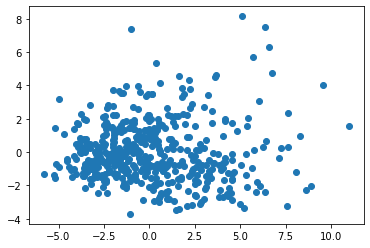

In [26]:
plt.scatter("Pc1", "Pc2", data=n_com2)

### Split data into Train and Test 

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(n_com2, out, test_size=0.2, random_state=0)

### Logistic Regression model

In [28]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(n_com2, out)

# Predicting the Test set results
y_pred = model.predict(X_test)

In [29]:
print("Train data accuracy is : ",model.score(X_train, y_train))
print("Test data accuracy is : ",model.score(X_test, y_test))    

Train data accuracy is :  0.61
Test data accuracy is :  0.62


In [30]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_pred)
print(cm)


[[62  1]
 [37  0]]


In [31]:
from sklearn.metrics import accuracy_score
logi = accuracy_score(y_test, y_pred)
print ("Accuracy with 2 Principal Components: {}".format(logi))

Accuracy with 2 Principal Components: 0.62


### 2) With 3 Principal components

In [32]:
from sklearn.decomposition import PCA

model_c3 = PCA(n_components=3)
model_c3.fit(input1)
X3 = model_c3.transform(input1)

In [33]:
model_c3.explained_variance_ratio_

array([0.4029221 , 0.15210395, 0.12230206])

In [34]:
np.sum(model_c3.explained_variance_ratio_)

0.677328105407708

In [35]:
n_com3 = pd.DataFrame(X3, columns=["Pc1", "Pc2", "Pc3"])
n_com3.head()

,Pc1,Pc2,Pc3
0,0.194032,-2.293302,0.770269
1,5.389440,-2.103401,0.346193
2,3.271249,-1.105371,1.829964
3,0.952243,-2.794771,-0.285249
4,4.040423,0.961337,-2.654044


### Spliting data in Train and Test

In [36]:
from sklearn.model_selection import train_test_split
F_train, F_test, t_train, t_test = train_test_split(n_com3, out, test_size=0.2, random_state=0)

### Logistic Regression model

In [37]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()

model1.fit(n_com3, out)

# Predicting the Test set results
t_pred = model1.predict(F_test)

In [38]:
print("Train data accuracy is : ",model1.score(F_train, t_train))
print("Test data accuracy is : ",model1.score(F_test, t_test))    

Train data accuracy is :  0.61
Test data accuracy is :  0.63


In [39]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(t_test, t_pred)
print(cm)


[[61  2]
 [35  2]]


In [40]:
logi2 = accuracy_score(t_test, t_pred)
print ("Accuracy with 3 Principal Components: {}".format(logi2))

Accuracy with 3 Principal Components: 0.63


## Results

In [41]:
pca_model = pd.DataFrame([logi,logi2],
             index=['with 2 Principal componenets ','with 3 Principal componenets'],columns=['accuracy'])

pca_model.sort_values('accuracy', ascending=False)

,accuracy
with 3 Principal componenets,0.63
with 2 Principal componenets,0.62
